# Telecom Churn 


## Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


#### Importing all necessary libraries

In [78]:
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For scaling data
from sklearn.preprocessing import scale

#To perform PCA
from sklearn.decomposition import PCA

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


#set the option to display maximum of 250 rows
pd.set_option("display.max_rows", 250)

#### Reading the dataset 

In [79]:
#path='C:/Subhajit/Newfolder/IOT/DS/Assgnments/Telecom Churn/'
path = './'
Telecom_Master=pd.read_csv(path+'telecom_churn_data.csv',sep=',', encoding='ISO-8859-1')

#### Let's explore data

Reading first 5 rows of the data set

In [80]:
Telecom_Master.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [81]:
Telecom_Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


There are  179-float64, 35-int64 and 12-object attributes 

In [82]:
Original_telecom=Telecom_Master.copy()
print('Total number of rows is ', Telecom_Master.shape[0], 'and', 'Total number of columns are ', Telecom_Master.shape[1])

Total number of rows is  99999 and Total number of columns are  226


In [83]:
Telecom_Master.columns.tolist()

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

- from above list , we can see 'aug_vbc_3g, jul_vbc_3g, jun_vbc_3g, sep_vbc_3g' columns are having the month name. So, these columns should be renamed like others.

In [84]:
Telecom_Master.rename(columns={'aug_vbc_3g':'vbc_3g_8',
                               'jul_vbc_3g':'vbc_3g_7',
                               'jun_vbc_3g':'vbc_3g_6',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

Lets describe the numnerical attributes

In [85]:
Telecom_Master.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,

### Missing value treatment

#### Checking missing value in dataset

In [86]:
Telecom_Master_orginal=Telecom_Master.copy()
pd.set_option("display.max_rows",500)
Checking_Missing_values=round(100*(Telecom_Master.isnull().sum()/len(Telecom_Master.index)),2)
Checking_Missing_values

mobile_number               0.00 
circle_id                   0.00 
loc_og_t2o_mou              1.02 
std_og_t2o_mou              1.02 
loc_ic_t2o_mou              1.02 
last_date_of_month_6        0.00 
last_date_of_month_7        0.60 
last_date_of_month_8        1.10 
last_date_of_month_9        1.66 
arpu_6                      0.00 
arpu_7                      0.00 
arpu_8                      0.00 
arpu_9                      0.00 
onnet_mou_6                 3.94 
onnet_mou_7                 3.86 
onnet_mou_8                 5.38 
onnet_mou_9                 7.75 
offnet_mou_6                3.94 
offnet_mou_7                3.86 
offnet_mou_8                5.38 
offnet_mou_9                7.75 
roam_ic_mou_6               3.94 
roam_ic_mou_7               3.86 
roam_ic_mou_8               5.38 
roam_ic_mou_9               7.75 
roam_og_mou_6               3.94 
roam_og_mou_7               3.86 
roam_og_mou_8               5.38 
roam_og_mou_9               7.75 
loc_og_t2t_mou

- Here, many columns related to voice call recharge and internet recharge are having missing values. We can impute these missing values with 0 by considering that the user did not recharge the service for that month. But, first we need to consider the average and total amount of voice and data amount to calculate .

##### Insights:
1. Related to data usage recharge, we can see the same percenatge of null values in both avearge and maximum data recharge variables.So, For that month, customer did not recharge for data usage. So, we will impute them as 0.

2. The % of internet recharge missing values is greater than call recharge mising values. It indicates that customers are using more call service than internet service.

Let's fetch all the columns related to internet recharge and impute with 0.

In [87]:
Telecom_Master_rech=Telecom_Master.filter(regex='rech')
Telecom_Master_rech=Telecom_Master.filter(regex='data')
Telecom_Master_rech=Telecom_Master_rech[Telecom_Master_rech.columns.difference(Telecom_Master.filter(regex='date').columns)].columns

Telecom_Master_rech

Index(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'],
      dtype='object')

In [88]:
Telecom_Master[Telecom_Master_rech]=Telecom_Master[Telecom_Master_rech].apply(lambda x:x.fillna(0))

In [89]:
Telecom_Master[Telecom_Master_rech].head()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9
0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0
1,0.0,154.0,50.0,0.0,0.0,154.0,25.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,0.0,46.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Filter high-value customers 

- As we need to predict churn only for high valued customers, we will filter out the high valued cuatomers on the basis of customers, those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

- Here good phase means first two months of data. We will decide the high valued customer on the basis of total and average amount recharge related features. Such as 'total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7'.


In [90]:
High_value_Customer=Telecom_Master[Telecom_Master[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)> Telecom_Master[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1).quantile(0.7)]

### Explanatory Data Analysis of High Value Customer data

In [91]:
High_value_Customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 226 entries, mobile_number to vbc_3g_9
dtypes: float64(179), int64(35), object(12)
memory usage: 51.9+ MB


In [92]:
Original_highValue=High_value_Customer.copy()
print('The total number of high valued customer is: ',High_value_Customer.shape[0])
print('The ratio between high valued customers and normal customers is: ',
      round(100*(len(High_value_Customer)/len(Telecom_Master)),2), ' and ', round(100*((len(Telecom_Master)-len(High_value_Customer))/len(Telecom_Master)),2))

The total number of high valued customer is:  29949
The ratio between high valued customers and normal customers is:  29.95  and  70.05


#### Missing value treatment 

In [93]:
Checking_missing_values=round(100*(High_value_Customer.isnull().sum()/len(High_value_Customer.index)),2)
Checking_missing_values

mobile_number               0.00 
circle_id                   0.00 
loc_og_t2o_mou              0.74 
std_og_t2o_mou              0.74 
loc_ic_t2o_mou              0.74 
last_date_of_month_6        0.00 
last_date_of_month_7        0.09 
last_date_of_month_8        0.52 
last_date_of_month_9        1.19 
arpu_6                      0.00 
arpu_7                      0.00 
arpu_8                      0.00 
arpu_9                      0.00 
onnet_mou_6                 1.65 
onnet_mou_7                 1.62 
onnet_mou_8                 3.63 
onnet_mou_9                 6.06 
offnet_mou_6                1.65 
offnet_mou_7                1.62 
offnet_mou_8                3.63 
offnet_mou_9                6.06 
roam_ic_mou_6               1.65 
roam_ic_mou_7               1.62 
roam_ic_mou_8               3.63 
roam_ic_mou_9               6.06 
roam_og_mou_6               1.65 
roam_og_mou_7               1.62 
roam_og_mou_8               3.63 
roam_og_mou_9               6.06 
loc_og_t2t_mou

#### Insights

From above missing values percenatges, we can see that Customers recharge the call service and data serivce amounts in same pattern in every month. Such as local outgoing call, standard outgoing call, 2g and 3g recharge count are following same pattern. 

So, if these variables are following same pattern in every month. Means, Customer did  not recharged. Then we can impute the missing values as 0.

- Let's filter out and impute these columns 

In [94]:
Impute_cols=High_value_Customer.filter(regex='(total_rech|max_rech|av_rech|count_rech|arpu_3g|arpu_2g)').columns
Impute_cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')

In [95]:
High_value_Customer[Impute_cols]=High_value_Customer[Impute_cols].fillna(0,axis=1)

- Rechecking the missing value percentage 

In [96]:
round(100*(High_value_Customer.isnull().sum()/len(High_value_Customer.index)),2)

mobile_number               0.00 
circle_id                   0.00 
loc_og_t2o_mou              0.74 
std_og_t2o_mou              0.74 
loc_ic_t2o_mou              0.74 
last_date_of_month_6        0.00 
last_date_of_month_7        0.09 
last_date_of_month_8        0.52 
last_date_of_month_9        1.19 
arpu_6                      0.00 
arpu_7                      0.00 
arpu_8                      0.00 
arpu_9                      0.00 
onnet_mou_6                 1.65 
onnet_mou_7                 1.62 
onnet_mou_8                 3.63 
onnet_mou_9                 6.06 
offnet_mou_6                1.65 
offnet_mou_7                1.62 
offnet_mou_8                3.63 
offnet_mou_9                6.06 
roam_ic_mou_6               1.65 
roam_ic_mou_7               1.62 
roam_ic_mou_8               3.63 
roam_ic_mou_9               6.06 
roam_og_mou_6               1.65 
roam_og_mou_7               1.62 
roam_og_mou_8               3.63 
roam_og_mou_9               6.06 
loc_og_t2t_mou

### Tag churners and remove attributes of the churn phase

We will tag churned customers based on the churn phase data. We consider the customers, those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase i.e in last(9th) month. 

- To tag the churners we are using below attributes

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

- If the data of these variables are 0, that means customers did not recharge for call and data service.  
- Deriving new feature 'Churn'.

In [97]:

High_value_Customer['Churn']=High_value_Customer[['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) & (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [98]:
Churned_DF=High_value_Customer[High_value_Customer['Churn']==1]
print('The total number of churners are: ', len(High_value_Customer[High_value_Customer['Churn']==1]))
print('The ratio between Churners and non-Churners is: ',
      round(100*(len(High_value_Customer[High_value_Customer['Churn']==1])/len(High_value_Customer.index))), ' : ', round(100*(len(High_value_Customer[High_value_Customer['Churn']==0])/len(High_value_Customer.index))))

The total number of churners are:  2451
The ratio between Churners and non-Churners is:  8  :  92


#### Removing all the variables related to churn phase i.e 9

Let's find all the columns of churning phase

In [99]:
Churn_cols=High_value_Customer.filter(regex='9').columns
Churn_cols

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [100]:
High_value_Customer.drop(Churn_cols,axis=1,inplace=True)

In [101]:
High_value_Customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 172 entries, mobile_number to Churn
dtypes: float64(135), int64(28), object(9)
memory usage: 39.5+ MB


- rechecking null values 

In [102]:
round(100*(High_value_Customer.isnull().sum()/len(High_value_Customer.index)),2)

mobile_number               0.00 
circle_id                   0.00 
loc_og_t2o_mou              0.74 
std_og_t2o_mou              0.74 
loc_ic_t2o_mou              0.74 
last_date_of_month_6        0.00 
last_date_of_month_7        0.09 
last_date_of_month_8        0.52 
arpu_6                      0.00 
arpu_7                      0.00 
arpu_8                      0.00 
onnet_mou_6                 1.65 
onnet_mou_7                 1.62 
onnet_mou_8                 3.63 
offnet_mou_6                1.65 
offnet_mou_7                1.62 
offnet_mou_8                3.63 
roam_ic_mou_6               1.65 
roam_ic_mou_7               1.62 
roam_ic_mou_8               3.63 
roam_og_mou_6               1.65 
roam_og_mou_7               1.62 
roam_og_mou_8               3.63 
loc_og_t2t_mou_6            1.65 
loc_og_t2t_mou_7            1.62 
loc_og_t2t_mou_8            3.63 
loc_og_t2m_mou_6            1.65 
loc_og_t2m_mou_7            1.62 
loc_og_t2m_mou_8            3.63 
loc_og_t2f_mou

##### Let's check the statistical properties of the High_value_Customer dataset

In [103]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
High_value_Customer.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn
count,2.994900e+04,29949.0,29726.0,29726.0,29726.0,29949.000000,29949.000000,29949.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.0,29463.0,28863.0,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29949.000000,29949.000000,29949.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.0,29463.0,28863.0,29455.000000,29463.000000,28863.000000,29949.000000,29949.000000,29949.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.

- We can clearly see the variables, which are having max, mean values as 0. We can drop these variables because these variables don't help to predict churners.

- So, Let's drop these features

In [104]:
cols=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
     'std_ic_t2o_mou_7','std_ic_t2o_mou_8','mobile_number','circle_id']
High_value_Customer.drop(cols,axis=1,inplace=True)

In [105]:
High_value_Customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 161 entries, last_date_of_month_6 to Churn
dtypes: float64(126), int64(26), object(9)
memory usage: 37.0+ MB


In [106]:
High_value_Customer.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn
count,29949.000000,29949.000000,29949.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29949.000000,29949.000000,29949.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29949.000000,29949.000000,29949.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29455.000000,29463.000000,28863.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.00000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,14875.000000,15134.000000,14444.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.00000

In [107]:
round(100*(High_value_Customer.isnull().sum()/len(High_value_Customer.index)),2)

last_date_of_month_6        0.00 
last_date_of_month_7        0.09 
last_date_of_month_8        0.52 
arpu_6                      0.00 
arpu_7                      0.00 
arpu_8                      0.00 
onnet_mou_6                 1.65 
onnet_mou_7                 1.62 
onnet_mou_8                 3.63 
offnet_mou_6                1.65 
offnet_mou_7                1.62 
offnet_mou_8                3.63 
roam_ic_mou_6               1.65 
roam_ic_mou_7               1.62 
roam_ic_mou_8               3.63 
roam_og_mou_6               1.65 
roam_og_mou_7               1.62 
roam_og_mou_8               3.63 
loc_og_t2t_mou_6            1.65 
loc_og_t2t_mou_7            1.62 
loc_og_t2t_mou_8            3.63 
loc_og_t2m_mou_6            1.65 
loc_og_t2m_mou_7            1.62 
loc_og_t2m_mou_8            3.63 
loc_og_t2f_mou_6            1.65 
loc_og_t2f_mou_7            1.62 
loc_og_t2f_mou_8            3.63 
loc_og_t2c_mou_6            1.65 
loc_og_t2c_mou_7            1.62 
loc_og_t2c_mou

#### Insight
We can see all the incoming call, outgoing call, voice calls variables are having same percentage of missing values for all the months. It indicates that customer did not recharge on that day. 

In [108]:
High_value_Customer[pd.isnull(High_value_Customer['onnet_mou_6'])].head(20)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn
0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.0,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.0,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
77,6/30/2014,7/31/2014,8/31/2014,30.000,82.378,674.950,NaN,34.23,149.69,NaN,39.44,179.18,NaN,0.0,0.00,NaN,0.0,0.00,NaN,34.23,149.69,NaN,32.18,101.63,NaN,0.91,29.86,NaN,0.00,3.90,NaN,67.33,281.19,NaN,0.00,0.00,NaN,0.00,0.00,NaN,6.35,40.09,NaN,6.35,40.09,NaN,2.93,28.04,NaN,0.00,7.58,NaN,0.0,0.0,0.0,76.61,356.93,NaN,79.46,191.24,NaN,43.31,94.18,NaN,2.03,0.00,NaN,124.81,285.43,NaN,8.00,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,8.00,0.00,0.0,135.38,289.33,NaN,0.0,0.0,NaN,2.56,0.50,NaN,0.0,3.39,4,5,3,0,1154,750,0,1000,750,6/17/2014,7/27/2014,8/27/2014,0,0,750,NaN,7/16/2014,NaN,0.0,1.0,0.0,0.0,154.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.00,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,NaN,1.0,NaN,1894,0.00,0.00,0.00,0
364,6/30/2014,7/31/2014,8/31/2014,0.000,792.112,989.368,NaN,433.49,198.96,NaN,845.11,923.58,NaN,0.0,0.0

such as 'onnet_mou_6','offnet_mou_6','roam_ic_mou_6', etc. are having 1.65% of NaN values. So, we can impute the missing vallues with 0. Let's fetch all variables.

In [109]:
Impute_cols=High_value_Customer.filter(regex='(mou|og_others|ic_others)').columns
Impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_

In [110]:
High_value_Customer[Impute_cols]=High_value_Customer[Impute_cols].fillna(0,axis=1)

- Rechecking the null values again

In [111]:
round(100*(High_value_Customer.isnull().sum()/len(High_value_Customer.index)),2)

last_date_of_month_6        0.00 
last_date_of_month_7        0.09 
last_date_of_month_8        0.52 
arpu_6                      0.00 
arpu_7                      0.00 
arpu_8                      0.00 
onnet_mou_6                 0.00 
onnet_mou_7                 0.00 
onnet_mou_8                 0.00 
offnet_mou_6                0.00 
offnet_mou_7                0.00 
offnet_mou_8                0.00 
roam_ic_mou_6               0.00 
roam_ic_mou_7               0.00 
roam_ic_mou_8               0.00 
roam_og_mou_6               0.00 
roam_og_mou_7               0.00 
roam_og_mou_8               0.00 
loc_og_t2t_mou_6            0.00 
loc_og_t2t_mou_7            0.00 
loc_og_t2t_mou_8            0.00 
loc_og_t2m_mou_6            0.00 
loc_og_t2m_mou_7            0.00 
loc_og_t2m_mou_8            0.00 
loc_og_t2f_mou_6            0.00 
loc_og_t2f_mou_7            0.00 
loc_og_t2f_mou_8            0.00 
loc_og_t2c_mou_6            0.00 
loc_og_t2c_mou_7            0.00 
loc_og_t2c_mou

- We can drop date columns also, because these date variables are not required for predicting the churners.

In [112]:
Date_cols=High_value_Customer.filter(regex='date').columns
Date_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [113]:
High_value_Customer=High_value_Customer.drop(Date_cols,axis=1)

- Let's check the columns info part

In [114]:
High_value_Customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 152 entries, arpu_6 to Churn
dtypes: float64(126), int64(26)
memory usage: 35.0 MB


In [115]:
round(100*(High_value_Customer.isnull().sum()/len(High_value_Customer.index)),5)

arpu_6                0.00000 
arpu_7                0.00000 
arpu_8                0.00000 
onnet_mou_6           0.00000 
onnet_mou_7           0.00000 
onnet_mou_8           0.00000 
offnet_mou_6          0.00000 
offnet_mou_7          0.00000 
offnet_mou_8          0.00000 
roam_ic_mou_6         0.00000 
roam_ic_mou_7         0.00000 
roam_ic_mou_8         0.00000 
roam_og_mou_6         0.00000 
roam_og_mou_7         0.00000 
roam_og_mou_8         0.00000 
loc_og_t2t_mou_6      0.00000 
loc_og_t2t_mou_7      0.00000 
loc_og_t2t_mou_8      0.00000 
loc_og_t2m_mou_6      0.00000 
loc_og_t2m_mou_7      0.00000 
loc_og_t2m_mou_8      0.00000 
loc_og_t2f_mou_6      0.00000 
loc_og_t2f_mou_7      0.00000 
loc_og_t2f_mou_8      0.00000 
loc_og_t2c_mou_6      0.00000 
loc_og_t2c_mou_7      0.00000 
loc_og_t2c_mou_8      0.00000 
loc_og_mou_6          0.00000 
loc_og_mou_7          0.00000 
loc_og_mou_8          0.00000 
std_og_t2t_mou_6      0.00000 
std_og_t2t_mou_7      0.00000 
std_og_t

- Now we have imputed all the NaN values of all the variables.

### Handling Outliers in Numeric Columns of High valued customer dataset

In [116]:
High_value_Customer.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn
count,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.0000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.00000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,14875.000000,15134.000000,14444.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,

- We can see the outliers are there in many of the features. So, we will treat them.

#### Treating Outliers by using cap the outlier techniques

In [117]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [118]:
# cap outliers in the numeric columns
Numeric_Col = High_value_Customer.select_dtypes(exclude=['datetime64[ns]','object','category']).columns.tolist()


# no need to remove outliers in Churn, hence removing
Numeric_Col.remove('Churn')

High_value_Customer[Numeric_Col] = High_value_Customer[Numeric_Col].apply(cap_outliers, axis=0)

In [119]:
High_value_Customer.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn
count,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,14875.000000,15134.000000,14444.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.0000

- So, we handled the outliers successfully.

However, still we can see there are many features having values 0 for more than 50% of records. Lets aggregate these features. 

In [120]:
feature_list = High_value_Customer.columns.tolist()
print(len(feature_list))
feature_list

152


['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [121]:
# apart from 'aon' and 'churn', all other features have _monhtnumber as suffix. 
# remove them for now
feature_list.remove('aon')
feature_list.remove('Churn')

In [122]:
feature_list = ['_'.join(str(x).split('_')[:-1]) for x in feature_list]
feature_list = list(set(feature_list))
print(len(feature_list))

50


In [123]:
# 'fb_user' and 'night_pck_user' have 1/0 values only, remove them as well
feature_list.remove('fb_user')
feature_list.remove('night_pck_user')

In [124]:
print(len(feature_list))
feature_list

48


['loc_og_t2t_mou',
 'loc_ic_mou',
 'total_rech_data',
 'vol_2g_mb',
 'vbc_3g',
 'std_og_t2f_mou',
 'count_rech_3g',
 'std_og_t2m_mou',
 'max_rech_amt',
 'arpu_3g',
 'isd_og_mou',
 'spl_ic_mou',
 'loc_ic_t2f_mou',
 'onnet_mou',
 'og_others',
 'std_ic_t2m_mou',
 'max_rech_data',
 'sachet_2g',
 'ic_others',
 'arpu',
 'total_rech_amt',
 'std_ic_t2t_mou',
 'std_ic_mou',
 'av_rech_amt_data',
 'vol_3g_mb',
 'monthly_2g',
 'std_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'total_ic_mou',
 'total_og_mou',
 'loc_og_t2f_mou',
 'loc_ic_t2t_mou',
 'loc_og_t2c_mou',
 'roam_ic_mou',
 'std_og_mou',
 'std_og_t2t_mou',
 'monthly_3g',
 'sachet_3g',
 'spl_og_mou',
 'last_day_rch_amt',
 'loc_og_t2m_mou',
 'loc_og_mou',
 'isd_ic_mou',
 'count_rech_2g',
 'arpu_2g',
 'total_rech_num',
 'offnet_mou',
 'roam_og_mou']

In [125]:
feature_aggregate = pd.DataFrame(columns=feature_list)

for feature in feature_list:
    feature_aggregate[feature] = High_value_Customer[feature+'_6'] + High_value_Customer[feature+'_7'] + High_value_Customer[feature+'_8']
feature_aggregate.head()

,loc_og_t2t_mou,loc_ic_mou,total_rech_data,vol_2g_mb,vbc_3g,std_og_t2f_mou,count_rech_3g,std_og_t2m_mou,max_rech_amt,arpu_3g,isd_og_mou,spl_ic_mou,loc_ic_t2f_mou,onnet_mou,og_others,std_ic_t2m_mou,max_rech_data,sachet_2g,ic_others,arpu,total_rech_amt,std_ic_t2t_mou,std_ic_mou,av_rech_amt_data,vol_3g_mb,monthly_2g,std_ic_t2f_mou,loc_ic_t2m_mou,total_ic_mou,total_og_mou,loc_og_t2f_mou,loc_ic_t2t_mou,loc_og_t2c_mou,roam_ic_mou,std_og_mou,std_og_t2t_mou,monthly_3g,sachet_3g,spl_og_mou,last_day_rch_amt,loc_og_t2m_mou,loc_og_mou,isd_ic_mou,count_rech_2g,arpu_2g,total_rech_num,offnet_mou,roam_og_mou
0,0.00,5.44,3.0,37.20,131.60,0.00,3.0,0.00,756.000000,636.51,0.00,0.00,1.15,0.00,0.0,0.00,756.0,0.0,0.00,626.004000,866.000000,0.00,0.00,756.0,343.94,0.0,0.00,4.13,5.44,0.00,0.00,0.16,0.00,0.00,0.00,0.00,3.0,0.0,0.00,756.000000,0.00,0.00,0.00,0.0,636.51,9.0,0.00,0.00
7,123.05,971.15,0.0,0.00,95.86,43.42,0.0,130.79,2099.555618,0.00,10.19,0.21,293.15,164.81,0.0,359.76,0.0,0.0,46.07,4433.254949,4791.212695,79.11,547.56,0.0,0.00,0.0,108.64,560.24,1613.24,1446.93,170.50,117.71,0.00,81.36,213.84,39.60,0.0,0.0,11.00,534.061696,918.29,1211.86,48.18,0.0,0.00,17.0,1346.50,74.39
8,527.21,121.05,5.0,356.03,1053.84,0.00,0.0,99.42,274.000000,19.83,0.00,0.00,0.00,799.80,0.0,27.16,177.0,4.0,0.00,1008.306000,1158.000000,0.68,27.84,246.0,762.89,1.0,0.00,87.04,148.89,1111.58,0.00,33.99,7.15,0.00,372.02,272.57,0.0,0.0,10.23,60.000000,202.08,729.31,0.00,5.0,0.00,54.0,311.77,0.00
16,175.15,718.47,0.0,0.00,24.34,0.00,0.0,105.79,350.000000,0.00,0.00,0.00,50.10,195.13,0.0,165.69,0.0,0.0,0.00,918.738000,1078.000000,153.76,322.16,0.0,0.00,0.0,2.69,526.66,1040.88,866.20,14.74,141.66,0.00,2.83,119.51,13.70,0.0,0.0,9.17,330.000000,547.56,737.48,0.23,0.0,0.00,18.0,688.79,17.74
21,33.98,372.12,0.0,0.00,0.00,0.00,0.0,2351.09,150.000000,0.00,0.00,0.00,17.84,319.66,0.0,207.66,0.0,0.0,0.00,1749.966000,1998.000000,20.22,227.90,0.0,0.00,0.0,0.00,322.02,600.02,2957.67,2.33,32.21,0.00,0.00,2636.77,285.66,0.0,0.0,0.00,100.000000,284.55,320.87,0.00,0.0,0.00,75.0,2638.00,0.00


In [126]:
# add aon and churn to new dataset
feature_aggregate['aon'] = High_value_Customer['aon']
feature_aggregate['Churn'] = High_value_Customer['Churn']

#### Checking correlation between numerical variables

In [127]:
corr = feature_aggregate.corr()
corr.style.background_gradient(cmap='coolwarm')

####  Below are the observations from heatmap

    total_ic_mou --- loc_ic_mou --> 0.90
    loc_ic_t2m_mou --loc_ic_mou -->0.89
    loc_ic_t2m_mou -- total_ic_mou --> 0.82  
    ---->> Can drop 'total_ic_mou'

    monthly_3g -- arpu_3g -->0.90
    monthly_3g -- count_rech_3g -->0.71
    arpu_3g -- count_rech_3g -->0.82
    arpu_2g -- arpu_3g -->0.965063
    ----->> Can drop 'arpu_3g'

    roam_og_mou -- roam_ic_mou -->0.84
    ------>> Can drop any one , lets drop 'roam_og_mou'

    loc_og_t2m_mou -- loc_og_mou -->0.86
    ----->> Can drop any one , lets drop 'loc_og_t2m_mou'

pairplot for churn against all other features

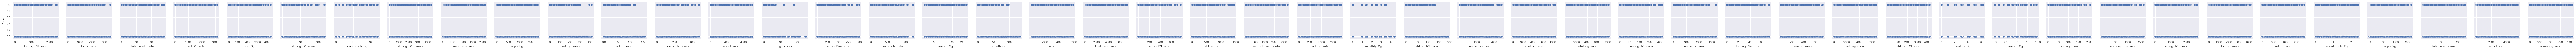

In [128]:
sns.pairplot(feature_aggregate, x_vars=feature_list, y_vars='Churn')

#### Observations from pairplot of 'Churn' with other columns
    - Churn positive are less when 'spl_ic_mou' are having values more than 1.0
    - Churn positive is less when 'isd_og_mou' is more than 300
    - Churn positive is less when 'ic_others' is more than 50
    - Churn positive are very low when 'og_others' is more than 10   

In [129]:
feature_aggregate.describe()

,loc_og_t2t_mou,loc_ic_mou,total_rech_data,vol_2g_mb,vbc_3g,std_og_t2f_mou,count_rech_3g,std_og_t2m_mou,max_rech_amt,arpu_3g,isd_og_mou,spl_ic_mou,loc_ic_t2f_mou,onnet_mou,og_others,std_ic_t2m_mou,max_rech_data,sachet_2g,ic_others,arpu,total_rech_amt,std_ic_t2t_mou,std_ic_mou,av_rech_amt_data,vol_3g_mb,monthly_2g,std_ic_t2f_mou,loc_ic_t2m_mou,total_ic_mou,total_og_mou,loc_og_t2f_mou,loc_ic_t2t_mou,loc_og_t2c_mou,roam_ic_mou,std_og_mou,std_og_t2t_mou,monthly_3g,sachet_3g,spl_og_mou,last_day_rch_amt,loc_og_t2m_mou,loc_og_mou,isd_ic_mou,count_rech_2g,arpu_2g,total_rech_num,offnet_mou,roam_og_mou,aon,Churn
count,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000
mean,228.811663,677.158858,3.757851,269.681058,440.816795,3.869241,1.055613,505.098068,499.778133,173.964411,3.769170,0.096996,41.296199,760.112945,0.593984,78.305298,217.006402,2.038091,2.797247,1650.261707,1931.532915,38.058423,128.141301,347.586086,926.358476,0.481587,6.505705,438.521567,859.687815,1840.422288,17.177767,178.297310,4.244061,32.217015,1027.538437,473.434666,0.589758,0.404724,17.326939,290.503580,478.380950,746.823089,25.380801,2.565178,163.692057,32.714307,1099.233959,53.363503,1244.304754,0.081839
std,380.102487,705.047641,5.491126,570.367641,868.187753,13.816491,2.053921,863.970517,330.125565,343.653182,28.285230,0.200707,79.595344,1025.625201,1.551563,146.923140,264.554659,4.448812,10.007491,895.240242,1057.854151,90.647116,221.419877,433.743520,1720.944603,0.973643,20.538949,475.287961,831.946124,1606.770208,35.458850,257.052206,8.974153,91.890970,1431.598358,882.756037,1.284646,1.281586,28.130449,235.308334,548.351358,840.156769,88.710244,4.555659,309.935479,21.983607,1072.291507,141.679339,970.827687,0.274124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-55.270000,1.000000,0.000000,0.000000,180.000000,0.000000
25%,27.140000,184.870000,0.000000,0.000000,0.000000,0.000000,0.000000,5.140000,316.000000,0.000000,0.000000,0.000000,1.100000,95.510000,0.000000,4.190000,0.000000,0.000000,0.000000,1069.453000,1246.000000,0.000000,11.830000,0.000000,0.000000,0.000000,0.000000,113.600000,280.710000,630.120000,0.000000,30.670000,0.000000,0.000000,12.830000,0.000000,0.000000,0.000000,0.250000,120.000000,92.280000,150.370000,0.000000,0.000000,0.000000,17.000000,329.650000,0.000000,469.000000,0.000000
50%,91.790000,443.810000,2.000000,7.010000,0.000000,0.000000,0.000000,93.780000,402.000000,0.000000,0.000000,0.000000,9.250000,325.570000,0.000000,24.920000,75.000000,0.000000,0.000000,1420.044000,1659.000000,6.230000,48.820000,165.000000,0.000000,0.000000,0.000000,278.980000,600.260000,1454.730000,2.800000,88.760000,0.000000,0.000000,279.700000,30.070000,0.000000,0.000000,6.550000,242.000000,276.310000,445.860000,0.000000,0.000000,0.400000,26.000000,774.260000,0.000000,884.000000,0.000000
75%,252.080000,917.880000,5.000000,221.430000,469.820000,0.450000,1.000000,582.820000,600.000000,191.990000,0.000000,0.100000,40.510000,980.360000,0.000000,81.800000,434.000000,2.000000,1.010000,1981.188000,2321.000000,32.610000,138.480000,594

In [130]:
# lets analysize the two features - fb_user and night_pck_user
fb_feats = High_value_Customer.filter(regex='fb_user').columns.tolist()
ngt_feats = High_value_Customer.filter(regex='night_pck_user').columns.tolist()
fb_feats.extend(ngt_feats)
fb_feats

['fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8']

In [131]:
# fill with 0 for nulls and convert to category
for col in fb_feats:
    feature_aggregate[[col]] = High_value_Customer[[col]].applymap(lambda x: 0 if pd.isnull(x) else 1)
    feature_aggregate[col] = feature_aggregate[col].astype('category')

In [132]:
feature_aggregate.dtypes

loc_og_t2t_mou      float64 
loc_ic_mou          float64 
total_rech_data     float64 
vol_2g_mb           float64 
vbc_3g              float64 
std_og_t2f_mou      float64 
count_rech_3g       float64 
std_og_t2m_mou      float64 
max_rech_amt        float64 
arpu_3g             float64 
isd_og_mou          float64 
spl_ic_mou          float64 
loc_ic_t2f_mou      float64 
onnet_mou           float64 
og_others           float64 
std_ic_t2m_mou      float64 
max_rech_data       float64 
sachet_2g           float64 
ic_others           float64 
arpu                float64 
total_rech_amt      float64 
std_ic_t2t_mou      float64 
std_ic_mou          float64 
av_rech_amt_data    float64 
vol_3g_mb           float64 
monthly_2g          float64 
std_ic_t2f_mou      float64 
loc_ic_t2m_mou      float64 
total_ic_mou        float64 
total_og_mou        float64 
loc_og_t2f_mou      float64 
loc_ic_t2t_mou      float64 
loc_og_t2c_mou      float64 
roam_ic_mou         float64 
std_og_mou    

Now, lets compare the datapoints for good and action phase.

In [133]:
# add new columns to the dataframe for good and action phases
for feature in feature_list:
    feature_aggregate['ga_'+feature] = High_value_Customer[[feature+'_6',feature+'_7',feature+'_8']].apply(lambda x: 0 if ((x[feature+'_8']) <= ((x[feature+'_6']+x[feature+'_7'])/2)) else 1, axis=1)
feature_aggregate.head()

,loc_og_t2t_mou,loc_ic_mou,total_rech_data,vol_2g_mb,vbc_3g,std_og_t2f_mou,count_rech_3g,std_og_t2m_mou,max_rech_amt,arpu_3g,isd_og_mou,spl_ic_mou,loc_ic_t2f_mou,onnet_mou,og_others,std_ic_t2m_mou,max_rech_data,sachet_2g,ic_others,arpu,total_rech_amt,std_ic_t2t_mou,std_ic_mou,av_rech_amt_data,vol_3g_mb,monthly_2g,std_ic_t2f_mou,loc_ic_t2m_mou,total_ic_mou,total_og_mou,loc_og_t2f_mou,loc_ic_t2t_mou,loc_og_t2c_mou,roam_ic_mou,std_og_mou,std_og_t2t_mou,monthly_3g,sachet_3g,spl_og_mou,last_day_rch_amt,loc_og_t2m_mou,loc_og_mou,isd_ic_mou,count_rech_2g,arpu_2g,total_rech_num,offnet_mou,roam_og_mou,aon,Churn,fb_user_6,fb_user_7,fb_user_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,ga_loc_og_t2t_mou,ga_loc_ic_mou,ga_total_rech_data,ga_vol_2g_mb,ga_vbc_3g,ga_std_og_t2f_mou,ga_count_rech_3g,ga_std_og_t2m_mou,ga_max_rech_amt,ga_arpu_3g,ga_isd_og_mou,ga_spl_ic_mou,ga_loc_ic_t2f_mou,ga_onnet_mou,ga_og_others,ga_std_ic_t2m_mou,ga_max_rech_data,ga_sachet_2g,ga_ic_others,ga_arpu,ga_total_rech_amt,ga_std_ic_t2t_mou,ga_std_ic_mou,ga_av_rech_amt_data,ga_vol_3g_mb,ga_monthly_2g,ga_std_ic_t2f_mou,ga_loc_ic_t2m_mou,ga_total_ic_mou,ga_total_og_mou,ga_loc_og_t2f_mou,ga_loc_ic_t2t_mou,ga_loc_og_t2c_mou,ga_roam_ic_mou,ga_std_og_mou,ga_std_og_t2t_mou,ga_monthly_3g,ga_sachet_3g,ga_spl_og_mou,ga_last_day_rch_amt,ga_loc_og_t2m_mou,ga_loc_og_mou,ga_isd_ic_mou,ga_count_rech_2g,ga_arpu_2g,ga_total_rech_num,ga_offnet_mou,ga_roam_og_mou
0,0.00,5.44,3.0,37.20,131.60,0.00,3.0,0.00,756.000000,636.51,0.00,0.00,1.15,0.00,0.0,0.00,756.0,0.0,0.00,626.004000,866.000000,0.00,0.00,756.0,343.94,0.0,0.00,4.13,5.44,0.00,0.00,0.16,0.00,0.00,0.00,0.00,3.0,0.0,0.00,756.000000,0.00,0.00,0.00,0.0,636.51,9.0,0.00,0.00,968.0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,123.05,971.15,0.0,0.00,95.86,43.42,0.0,130.79,2099.555618,0.00,10.19,0.21,293.15,164.81,0.0,359.76,0.0,0.0,46.07,4433.254949,4791.212695,79.11,547.56,0.0,0.00,0.0,108.64,560.24,1613.24,1446.93,170.50,117.71,0.00,81.36,213.84,39.60,0.0,0.0,11.00,534.061696,918.29,1211.86,48.18,0.0,0.00,17.0,1346.50,74.39,802.0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1
8,527.21,121.05,5.0,356.03,1053.84,0.00,0.0,99.42,274.000000,19.83,0.00,0.00,0.00,799.80,0.0,27.16,177.0,4.0,0.00,1008.306000,1158.000000,0.68,27.84,246.0,762.89,1.0,0.00,87.04,148.89,1111.58,0.00,33.99,7.15,0.00,372.02,272.57,0.0,0.0,10.23,60.000000,202.08,729.31,0.00,5.0,0.00,54.0,311.77,0.00,315.0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
16,175.15,718.47,0.0,0.00,24.34,0.00,0.0,105.79,350.000000,0.00,0.00,0.00,50.10,195.13,0.0,165.69,0.0,0.0,0.00,918.738000,1078.000000,153.76,322.16,0.0,0.00,0.0,2.69,526.66,1040.88,866.20,14.74,141.66,0.00,2.83,119.51,13.70,0.0,0.0,9.17,330.000000,547.56,737.48,0.23,0.0,0.00,18.0,688.79,17.74,511.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
21,33.98,372.12,0.0,0.00,0.00,0.00,0.0,2351.09,150.000000,0.00,0.00,0.00,17.84,319.66,0.0,207.66,0.0,0.0,0.00,1749.966000,1998.000000,20.22,227.90,0.0,0.00,0.0,0.00,322.02,600.02,2957.67,2.33,32.21,0.00,0.00,2636.77,285.66,0.0,0.0,0.00,100.000000,284.55,320.87,0.00,0.0,0.00,75.0,2638.00,0.00,720.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,0,1,1,0


In [134]:
feature_aggregate.shape

(29949, 104)

Lets create some more features

In [135]:
# sum of 2g and 3g to total arpu
feature_aggregate['arpu_data_to_total_ratio'] = round((feature_aggregate['arpu_2g']+feature_aggregate['arpu_3g'])/feature_aggregate['arpu'], 6)
feature_aggregate['arpu_data_to_total_ratio'].replace(np.inf, 0)
    
# average data recharge to amount recharge
feature_aggregate['data_to_amt_ratio'] = round(feature_aggregate['av_rech_amt_data']/feature_aggregate['total_rech_amt'], 6)
    
# difference of onnet and offnet
feature_aggregate['diff_on_off_net'] = round(feature_aggregate['onnet_mou'] - feature_aggregate['offnet_mou'], 6)
    
    
# difference of incoming and outgoing
feature_aggregate['diff_incoming_outgoing'] = round(feature_aggregate['total_ic_mou'] - feature_aggregate['total_og_mou'], 6)    

In [136]:
# drop any row with nan or inf values
feature_aggregate = feature_aggregate[~feature_aggregate.isin([np.nan, np.inf, -np.inf]).any(1)]

In [137]:
feature_aggregate.shape

(29948, 108)

We have total 108 features in the dataset.

### Modeling the High valued customer dataset

Importing the required library

##### Scaling all the independent variables, except categorical ones

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
df_cat = feature_aggregate.select_dtypes(include=['category'])

feature_aggregate = feature_aggregate.drop(df_cat.columns.tolist(), axis=1)

In [164]:
X = feature_aggregate.drop('Churn',axis=1)
y = feature_aggregate['Churn']

In [165]:
standard_scaler = StandardScaler()
X = pd.DataFrame(data = standard_scaler.fit_transform(X), columns=X.columns.tolist(), index = X.index) 

In [169]:
# merge categorical in X again
X = pd.concat([X, df_cat], axis=1)

In [171]:
# similarly, merge categoricalin feature_aggregate
feature_aggregate = pd.concat([feature_aggregate, df_cat], axis=1)

##### Let's split the dataset into train and test set

- Splitting data into independent an dependent variables

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
#X.columns = feature_aggregate.drop('Churn',axis=1).columns
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

- Let's check the size of the trainn and test set

In [176]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20963, 107)
(20963,)
(8985, 107)
(8985,)


### Applying PCA(Principal Component Analysis) to reduce dimension 

Importing required library

In [177]:
from sklearn.decomposition import PCA

Creating instance of the PCA

In [178]:
pca = PCA(svd_solver='randomized', random_state=100)

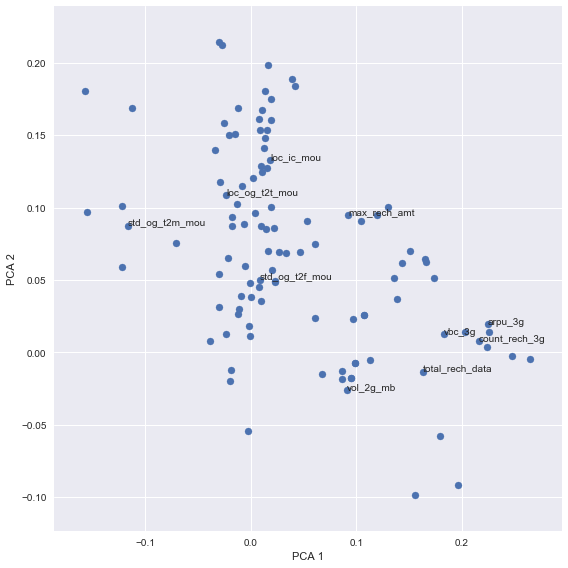

In [179]:
# Lets see the top 10 columns in PCA in 2d space
pca.fit(X_train)
fig = plt.figure(figsize = (8,8))
plt.scatter(pca.components_[0],pca.components_[1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
for i, txt in enumerate(X_train.columns[:10]):
    plt.annotate(txt, (pca.components_[0][i],pca.components_[1][i]))
plt.tight_layout()
plt.show()

##### List of PCA components.

In [180]:
pca.components_

array([[ -2.31887015e-02,   1.81945828e-02,   1.63323152e-01, ...,
          9.54836514e-02,   9.90321466e-02,   1.07130405e-01],
       [  1.08607089e-01,   1.33051846e-01,  -1.32980640e-02, ...,
         -1.79586243e-02,  -7.27945539e-03,   2.60729125e-02],
       [  1.44673452e-01,   2.55239425e-01,  -1.45714754e-01, ...,
         -9.83657135e-03,  -1.91445599e-02,  -4.50338098e-02],
       ..., 
       [ -0.00000000e+00,  -8.38651871e-18,  -5.72551346e-17, ...,
         -4.02270734e-01,  -5.58890439e-01,  -1.60685201e-01],
       [  0.00000000e+00,  -2.53825364e-17,  -1.05239995e-16, ...,
         -5.81530959e-01,   3.86614500e-01,   1.11134926e-01],
       [  0.00000000e+00,   5.13282165e-18,  -1.08591532e-17, ...,
         -1.55293075e-05,  -1.95373247e-01,   6.79580234e-01]])

##### Let's check the variance ratios of each features

In [181]:
pca.explained_variance_ratio_

array([  1.12311587e-01,   8.21834459e-02,   5.93142667e-02,
         4.89469947e-02,   4.65721915e-02,   3.07990278e-02,
         2.85175463e-02,   2.66167620e-02,   2.23296831e-02,
         2.14411135e-02,   1.90214307e-02,   1.79861474e-02,
         1.75642250e-02,   1.74184943e-02,   1.65882781e-02,
         1.60412717e-02,   1.37109649e-02,   1.33748543e-02,
         1.28485684e-02,   1.26339669e-02,   1.19704771e-02,
         1.17532728e-02,   1.15997237e-02,   1.12040468e-02,
         1.08458917e-02,   1.07709798e-02,   1.04585617e-02,
         1.03113463e-02,   9.91598098e-03,   9.42216301e-03,
         9.37911622e-03,   9.12986899e-03,   8.90933318e-03,
         8.64787590e-03,   8.46348099e-03,   8.27669425e-03,
         8.18028320e-03,   7.84799604e-03,   7.66199387e-03,
         7.49547242e-03,   7.41486576e-03,   7.27459780e-03,
         7.24711022e-03,   7.12207611e-03,   6.92273767e-03,
         6.34122991e-03,   6.29693294e-03,   6.03091217e-03,
         5.90230121e-03,

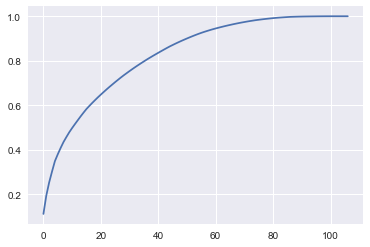

In [182]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [183]:
for x, y in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(x, ':', y )

0 : 0.112311586511
1 : 0.194495032438
2 : 0.253809299095
3 : 0.302756293786
4 : 0.349328485318
5 : 0.380127513166
6 : 0.408645059513
7 : 0.435261821561
8 : 0.457591504625
9 : 0.479032618108
10 : 0.498054048857
11 : 0.516040196259
12 : 0.533604421223
13 : 0.551022915503
14 : 0.567611193598
15 : 0.583652465295
16 : 0.597363430179
17 : 0.61073828451
18 : 0.623586852886
19 : 0.636220819773
20 : 0.648191296888
21 : 0.659944569732
22 : 0.671544293447
23 : 0.682748340231
24 : 0.693594231907
25 : 0.704365211725
26 : 0.714823773424
27 : 0.725135119756
28 : 0.735051100732
29 : 0.744473263744
30 : 0.753852379968
31 : 0.762982248955
32 : 0.771891582138
33 : 0.780539458034
34 : 0.789002939029
35 : 0.797279633275
36 : 0.805459916474
37 : 0.813307912517
38 : 0.820969906385
39 : 0.828465378808
40 : 0.835880244568
41 : 0.843154842365
42 : 0.850401952582
43 : 0.857524028692
44 : 0.864446766363
45 : 0.870787996274
46 : 0.877084929213
47 : 0.883115841379
48 : 0.889018142592
49 : 0.894685643408
50 : 0.9002

- From above cumulative sum, we can see that around 95% of the information is being explained by 62 components

##### Performing incremaental PCA

In [184]:
from sklearn.decomposition import IncrementalPCA
pca_incremental = IncrementalPCA(n_components=62)

train_pca = pca_incremental.fit_transform(X_train)
train_pca.shape

(20963, 62)

### Building model by using Random Forest classifier

- Importing libraries and creating instance of RandomForestClassifier with default hyper parameters and we are using class weight as balanced_subsample to handle the imbalace in the data.


In [185]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced_subsample')

- Fitting the train data to the model

In [186]:
rf_model.fit(train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

- Fetching  evaluation metrics to evaluate model

In [187]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_score, recall_score, f1_score

- Predicting the values on the basis of train data

In [188]:
Trian_Pred=rf_model.predict(train_pca)

In [189]:
print(classification_report(y_train,Trian_Pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19250
          1       0.99      0.90      0.94      1713

avg / total       0.99      0.99      0.99     20963



From above classification report, we can see the precison, recall and f1-score is 0.99 means almost 1. So, the model is overfitting. So, we will use GridSearch cross validation

In [190]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [191]:
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# create gridsearch object
rfm = RandomForestClassifier(class_weight='balanced_subsample')
model = GridSearchCV(estimator=rfm, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [192]:
model.fit(train_pca,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   49.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

##### print best hyperparameters

In [193]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.839606491539
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [194]:
test_pca=pca_incremental.transform(X_test)
y_pred = model.predict(test_pca)

In [195]:
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', round(accuracy1,2))

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round(sensitivity1,2) )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round(specificity1,2))

# check area under curve
y_pred_prob = model.predict_proba(test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred),2))

Confusion Matrix : 
 [[8142  105]
 [ 515  223]]
Accuracy :  0.93
Sensitivity :  0.99
Specificity :  0.3
AUC:    	 0.64


##### Here, specificity is too low. So we will try Logistic regression with PCA

### Logistic Regression with PCA

Let's check the size of Train and Test data.

In [196]:
print(train_pca.shape)
print(y_train.shape)
print(test_pca.shape)
print(y_test.shape)

(20963, 62)
(20963,)
(8985, 62)
(8985,)


Implementing Logistic regression with default parameters. 

In [197]:
from sklearn.linear_model import LogisticRegression

Creating instance of LogisticRegression and assign class_weight as balanced to handle imbalance the data.

In [198]:
regression=LogisticRegression(class_weight='balanced')

In [199]:
regression.fit(train_pca,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [200]:
y_train_pred=regression.predict(train_pca)

In [201]:
print(classification_report(y_train,y_train_pred))

             precision    recall  f1-score   support

          0       0.98      0.82      0.89     19250
          1       0.29      0.85      0.43      1713

avg / total       0.93      0.82      0.85     20963



### Evaluation on Test data

In [202]:
y_pred=regression.predict(test_pca)

In [203]:
# create confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', round(accuracy1,2))

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round(sensitivity1,2) )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round(specificity1,2))

# check area under curve
y_pred_prob = model.predict_proba(test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred),2))

[[6773 1474]
 [ 108  630]]
Accuracy :  0.82
Sensitivity :  0.82
Specificity :  0.85
AUC:    	 0.84


#### Tuning the hyperparameters

In [204]:
y_train.value_counts()/len(y_train.index)

0    0.918285
1    0.081715
Name: Churn, dtype: float64

#### Handling data imbalance
- Here, we can see the target variable is hghly imbalanced. So, we need to take care of this during tuning hyper parameters. we can assign the appropriate values to class_weight parameters.

In [205]:
from sklearn.pipeline import Pipeline

In [206]:
regression=LogisticRegression(class_weight={0:0.1,1:0.9})

pca=PCA()

steps=[("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", regression)
        ]

pca_regression=Pipeline(steps) 
# hyperparameter space
params = {'pca__n_components': [55, 62], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_regression, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [207]:
model.fit(train_pca,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   55.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9}, dual...y='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'pca__n_components': [55, 62], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [208]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.753768,0.026489,0.886391,0.891668,0.1,l1,55,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 55}",32,0.891846,0.888709,0.875219,0.893915,0.883414,0.896415,0.893172,0.895024,0.888309,0.884276,0.179005,0.010320,0.006528,0.004522
1,0.947462,0.032779,0.891544,0.897850,0.1,l1,62,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 62}",16,0.897229,0.896847,0.878991,0.900515,0.887049,0.899270,0.892550,0.897093,0.901902,0.895525,0.078171,0.005701,0.007980,0.001794
2,0.924079,0.034389,0.886822,0.892351,0.1,l2,55,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 55}",17,0.892123,0.889204,0.875353,0.894692,0.884481,0.897070,0.893664,0.895905,0.888489,0.884882,0.038880,0.005186,0.006553,0.004606
3,0.976978,0.035920,0.891759,0.898792,0.1,l2,62,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 62}",1,0.896804,0.897837,0.879895,0.901586,0.887876,0.899925,0.892119,0.898374,0.902103,0.896241,0.116183,0.009383,0.007595,0.001827
4,1.010869,0.024986,0.886804,0.892442,0.5,l1,55,"{'logistic__C': 0.5, 'logistic__penalty': 'l1', 'pca__n_components': 55}",31,0.892042,0.889364,0.875587,0.894757,0.884349,0.897213,0.893672,0.895955,0.888372,0.884919,0.104416,0.003519,0.006464,0.004616
5,1.142939,0.028893,0.891748,0.898867,0.5,l1,62,"{'logistic__C': 0.5, 'logistic__penalty': 'l1', 'pca__n_components': 62}",2,0.896860,0.897902,0.879864,0.901631,0.887848,0.900033,0.892189,0.898413,0.901984,0.896353,0.105600,0.003777,0.007583,0.001814
6,0.956284,0.029583,0.886813,0.892488,0.5,l2,55,"{'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 55}",21,0.892049,0.889386,0.875377,0.894814,0.884606,0.897242,0.893693,0.896036,0.888344,0.884960,0.101274,0.006148,0.006523,0.004624
7,1.075150,0.028782,0.891680,0.898946,0.5,l2,62,"{'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 62}",5,0.896557,0.897983,0.879895,0.901746,0.887872,0.900072,0.892123,0.898550,0.901957,0.896380,0.127313,0.003248,0.007523,0.001832
8,1.204347,0.027283,0.886816,0.892489,1,l1,55,"{'logistic__C': 1, 'logistic__penalty': 'l1', 'pca__n_components': 55}",19,0.892062,0.889408,0.875512,0.894806,0.884482,0.897253,0.893700,0.896019,0.888323,0.884957,0.166230,0.003057,0.006487,0.004620
9,1.225179,0.028782,0.891710,0.898934,1,l1,62,"{'logistic__C': 1, 'logistic__penalty': 'l1', 'pca__n_components': 62}",3,0.896660,0.897968,0.879899,0.901717,0.887818,0.900081,0.892203,0.898504,0.901975,0.896399,0.144203,0.005071,0.007547,0.001822


In [209]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.891758794918
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 62}


In [210]:
y_pred=model.predict(test_pca)

In [211]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', round(accuracy1,2))

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round(sensitivity1,2) )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round(specificity1,2))

# check area under curve
y_pred_prob = model.predict_proba(test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred),2))

[[6970 1277]
 [ 121  617]]
Accuracy :  0.84
Sensitivity :  0.85
Specificity :  0.84
AUC:    	 0.84


Here, we can see the good score in senstivity and specificity. So, we will go with logistic regression model.

### So, we have built the model, which preidcts customers who will churn.

#### Building model to identify the important features by using Random Forest.

In [212]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf = RandomForestClassifier(n_estimators=100,max_features=max_features,  class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

10


In [213]:
rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.8s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features=10,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=4, verbose=1, warm_start=False)

#### Fetching all the important feature and displying in a dataframe, whuch will be required to do in recommedation 

In [214]:
features=feature_aggregate.drop('Churn',axis=1).columns
importance_value=rf.feature_importances_

Feature_Importance=pd.DataFrame({'Features':features, 'Importance':importance_value} )
Feature_Importance=Feature_Importance.sort_values('Importance',ascending=False)
Feature_Importance

,Features,Importance
76,ga_loc_ic_t2m_mou,0.041863
103,fb_user_8,0.028505
50,ga_loc_ic_mou,0.027215
77,ga_total_ic_mou,0.026512
88,ga_last_day_rch_amt,0.024883
1,loc_ic_mou,0.023613
80,ga_loc_ic_t2t_mou,0.023521
106,night_pck_user_8,0.021507
89,ga_loc_og_t2m_mou,0.019688
41,loc_og_mou,0.019634


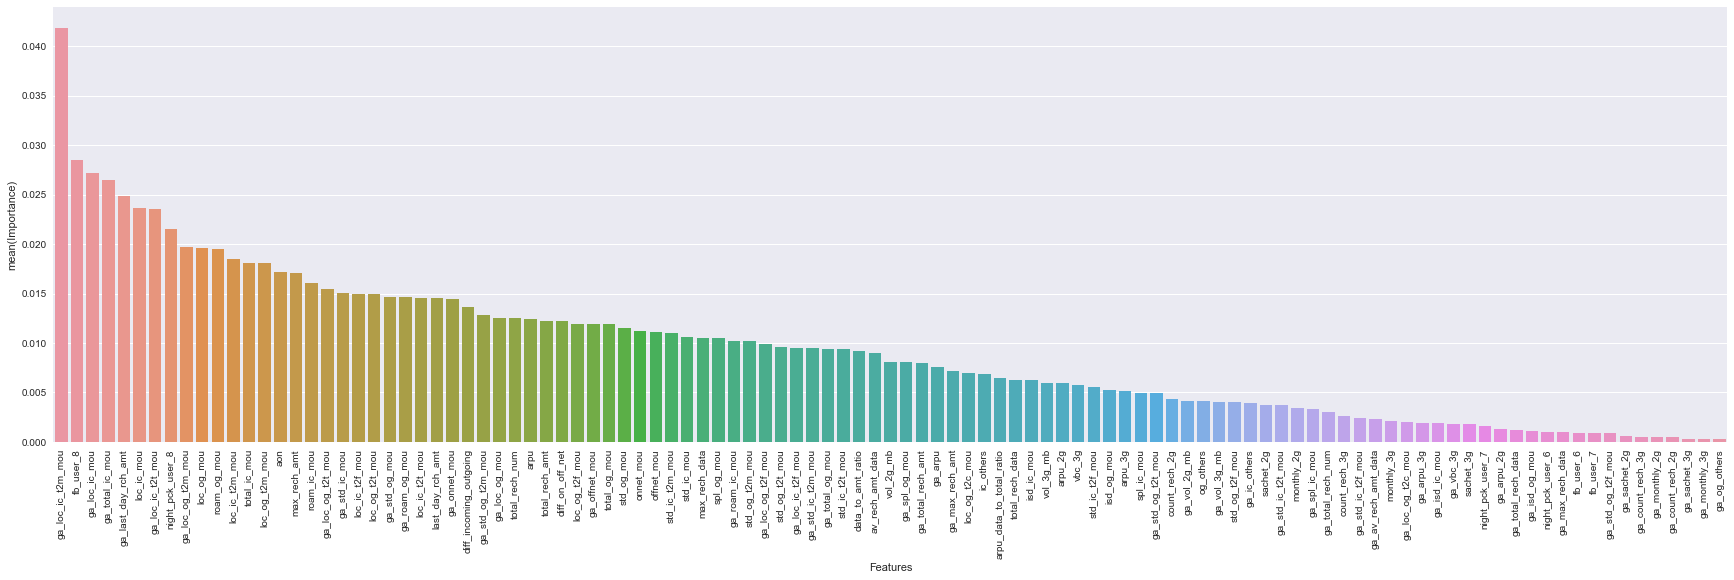

In [215]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
sns.barplot(x="Features", y="Importance", data=Feature_Importance);


From above dataframe, we can see the features and it's importance values. We will extarct top 10 features to predict the churners again.

#### Extracting top 10 features from this dataframe

In [216]:
Top_Features=Feature_Importance.copy()
Top_Features=Top_Features.set_index('Features')

In [217]:
Top_Features=Feature_Importance[:10]

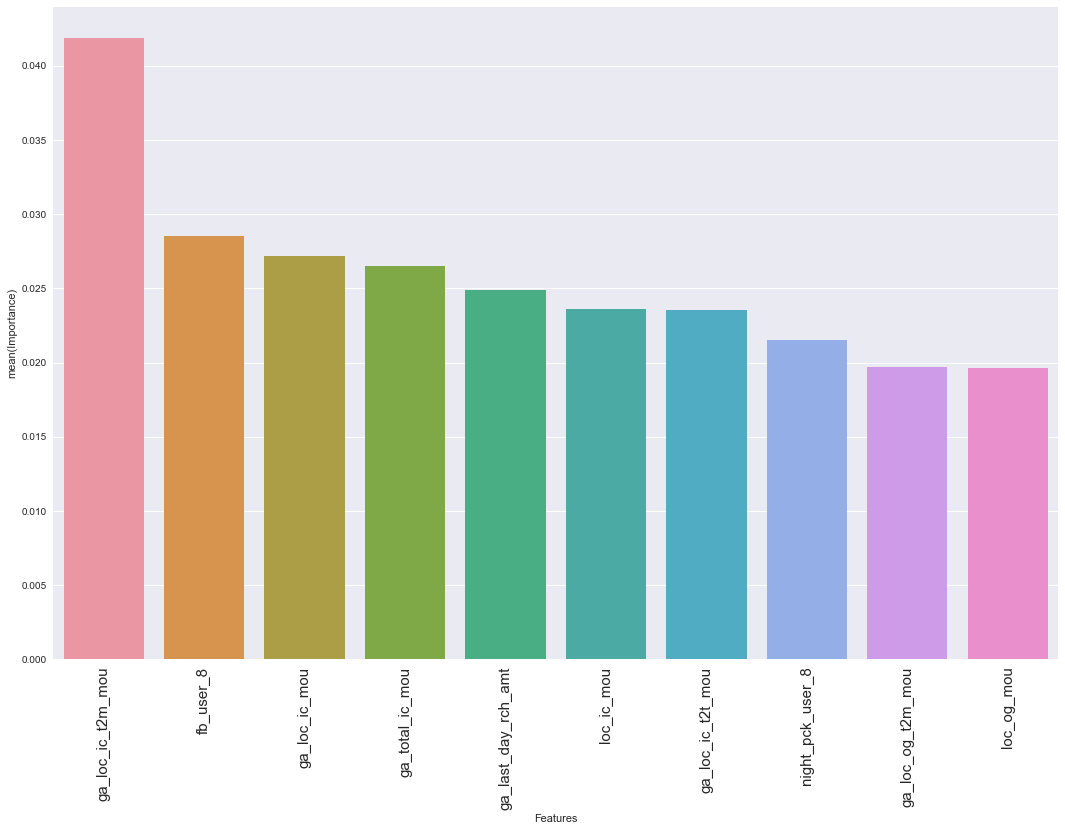

In [218]:
plt.figure(figsize=(18,12))
plt.xticks(rotation=90,size=15)
sns.barplot(x="Features", y="Importance", data=Top_Features);

In [219]:
print(Top_Features)

                Features  Importance
76   ga_loc_ic_t2m_mou    0.041863  
103  fb_user_8            0.028505  
50   ga_loc_ic_mou        0.027215  
77   ga_total_ic_mou      0.026512  
88   ga_last_day_rch_amt  0.024883  
1    loc_ic_mou           0.023613  
80   ga_loc_ic_t2t_mou    0.023521  
106  night_pck_user_8     0.021507  
89   ga_loc_og_t2m_mou    0.019688  
41   loc_og_mou           0.019634  


### Conclusion and Recommendation

From the top features we can make the below conclusion and recommendations:
- 'ga_loc_ic_mou ' , 'ga_loc_ic_t2t_mou' , 'ga_loc_ic_t2m_mou' , 'ga_total_ic_mou' , these features indicate that the incoming mobile usage in the action month is importat in predicting the churning of the customer.
- 
    